In [ ]:
# Importações necessárias
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Configuração para reprodutibilidade
np.random.seed(42)
keras.utils.set_random_seed(42)

print("Keras versão:", keras.__version__)
print("Configuração realizada com sucesso!")

In [9]:
# Definindo as funções a serem aproximadas

def function_a(x):
    """Função a) f(x) = sin(2x) + cos(3x)"""
    return np.sin(2*x) + np.cos(3*x)

def function_b(x):
    """Função b) f(x) = 10x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2"""
    return 10*x**5 + 5*x**4 + 2*x**3 - 0.5*x**2 + 3*x + 2

# Testando as funções
x_test = np.array([0, 1, 2, 3, 4, 5])
print("Teste da Função A (sin(2x) + cos(3x)):")
for x_val in x_test:
    print(f"f({x_val}) = {function_a(x_val):.4f}")

print("\nTeste da Função B (10x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2):")
for x_val in x_test:
    print(f"f({x_val}) = {function_b(x_val):.4f}")

Teste da Função A (sin(2x) + cos(3x)):
f(0) = 1.0000
f(1) = -0.0807
f(2) = 0.2034
f(3) = -1.1905
f(4) = 1.8332
f(5) = -1.3037

Teste da Função B (10x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2):
f(0) = 2.0000
f(1) = 21.5000
f(2) = 422.0000
f(3) = 2895.5000
f(4) = 11654.0000
f(5) = 34629.5000


In [10]:
# Geração dos conjuntos de dados

def generate_dataset(func, x_min=0, x_max=5, n_samples=1000):
    """Gera conjunto de dados para uma função"""
    x = np.random.uniform(x_min, x_max, n_samples)
    y = func(x)
    return x.reshape(-1, 1), y

# Gerando dados para ambas as funções
print("Gerando conjuntos de dados...")

# Função A: sin(2x) + cos(3x)
x_a, y_a = generate_dataset(function_a, n_samples=2000)
x_train_a, x_temp_a, y_train_a, y_temp_a = train_test_split(x_a, y_a, test_size=0.4, random_state=42)
x_val_a, x_test_a, y_val_a, y_test_a = train_test_split(x_temp_a, y_temp_a, test_size=0.5, random_state=42)

print(f"Função A - Treinamento: {len(x_train_a)} amostras")
print(f"Função A - Validação: {len(x_val_a)} amostras")
print(f"Função A - Teste: {len(x_test_a)} amostras")

# Função B: 10x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2
x_b, y_b = generate_dataset(function_b, n_samples=2000)
x_train_b, x_temp_b, y_train_b, y_temp_b = train_test_split(x_b, y_b, test_size=0.4, random_state=42)
x_val_b, x_test_b, y_val_b, y_test_b = train_test_split(x_temp_b, y_temp_b, test_size=0.5, random_state=42)

print(f"Função B - Treinamento: {len(x_train_b)} amostras")
print(f"Função B - Validação: {len(x_val_b)} amostras")
print(f"Função B - Teste: {len(x_test_b)} amostras")

# Normalização dos dados para a Função B (devido aos valores muito grandes)
scaler_x_b = StandardScaler()
scaler_y_b = StandardScaler()

x_train_b_scaled = scaler_x_b.fit_transform(x_train_b)
x_val_b_scaled = scaler_x_b.transform(x_val_b)
x_test_b_scaled = scaler_x_b.transform(x_test_b)

y_train_b_scaled = scaler_y_b.fit_transform(y_train_b.reshape(-1, 1)).flatten()
y_val_b_scaled = scaler_y_b.transform(y_val_b.reshape(-1, 1)).flatten()

print("\nNormalização aplicada na Função B devido à magnitude dos valores")

Gerando conjuntos de dados...
Função A - Treinamento: 1200 amostras
Função A - Validação: 400 amostras
Função A - Teste: 400 amostras
Função B - Treinamento: 1200 amostras
Função B - Validação: 400 amostras
Função B - Teste: 400 amostras

Normalização aplicada na Função B devido à magnitude dos valores


In [ ]:
# Criação dos modelos de perceptron multicamadas

def create_mlp_model(input_dim=1, hidden_layers=[64, 32, 16], activation='relu', output_activation='linear'):
    """
    Cria um modelo de perceptron multicamadas
    
    Args:
        input_dim: dimensão de entrada
        hidden_layers: lista com número de neurônios em cada camada oculta
        activation: função de ativação das camadas ocultas
        output_activation: função de ativação da camada de saída
    """
    model = Sequential()
    
    # Primeira camada oculta
    model.add(Dense(hidden_layers[0], input_dim=input_dim, activation=activation))
    
    # Camadas ocultas adicionais
    for neurons in hidden_layers[1:]:
        model.add(Dense(neurons, activation=activation))
    
    # Camada de saída
    model.add(Dense(1, activation=output_activation))
    
    return model

# Criando modelos para ambas as funções
print("Criando modelos...")

# Modelo para Função A
model_a = create_mlp_model(hidden_layers=[64, 32, 16])
model_a.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Modelo para Função B
model_b = create_mlp_model(hidden_layers=[128, 64, 32, 16], activation='tanh')  # Arquitetura mais complexa para função polinomial
model_b.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

print("Modelo A (Função Trigonométrica):")
model_a.summary()

print("\nModelo B (Função Polinomial):")
model_b.summary()

Criando modelos...
Modelo A (Função Trigonométrica):


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)


Modelo B (Função Polinomial):


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,137 (43.50 KB)

 Trainable params: 11,137 (43.50 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Configuração dos callbacks
early_stopping_a = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr_a = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

early_stopping_b = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr_b = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

print("Iniciando treinamento...")

# Treinamento do Modelo A (Função Trigonométrica)
print("\nTreinando modelo para Função A: f(x) = sin(2x) + cos(3x)")
history_a = model_a.fit(
    x_train_a, y_train_a,
    validation_data=(x_val_a, y_val_a),
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping_a, reduce_lr_a],
    verbose=1
)

Iniciando treinamento...

Treinando modelo para Função A: f(x) = sin(2x) + cos(3x)
Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7828 - mae: 0.7181 - val_loss: 0.7692 - val_mae: 0.7139 - learning_rate: 0.0010
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7787 - mae: 0.7091 - val_loss: 0.7375 - val_mae: 0.7086 - learning_rate: 0.0010
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7457 - mae: 0.6967 - val_loss: 0.7052 - val_mae: 0.6758 - learning_rate: 0.0010
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7061 - mae: 0.6645 - val_loss: 0.6901 - val_mae: 0.6397 - learning_rate: 0.0010
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6820 - mae: 0.6327 - val_loss: 0.6324 - val_mae: 0.5953 - learning_rate: 0.0010
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6451 - mae: 0.5953 - val_loss: 0.6119 - val_mae: 0.5495 - learning_rate: 0.0010
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6279 - mae

In [13]:
# Treinamento do Modelo B (Função Polinomial)
print("\nTreinando modelo para Função B: f(x) = 10x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2")
history_b = model_b.fit(
    x_train_b_scaled, y_train_b_scaled,
    validation_data=(x_val_b_scaled, y_val_b_scaled),
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping_b, reduce_lr_b],
    verbose=1
)

print("\nTreinamento concluído!")


Treinando modelo para Função B: f(x) = 10x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2
Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6401 - mae: 0.5623 - val_loss: 0.3114 - val_mae: 0.4013 - learning_rate: 0.0010
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1092 - mae: 0.2291 - val_loss: 0.0437 - val_mae: 0.1298 - learning_rate: 0.0010
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0222 - mae: 0.0994 - val_loss: 0.0221 - val_mae: 0.1050 - learning_rate: 0.0010
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mae: 0.0795 - val_loss: 0.0137 - val_mae: 0.0767 - learning_rate: 0.0010
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mae: 0.0553 - val_loss: 0.0133 - val_mae: 0.0604 - learning_rate: 0.0010
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mae: 0.0331 - val_loss: 0.0042 - val_mae: 0.0373 - learning_rate: 0.0010
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mae: 0.0

In [ ]:
# Avaliação dos modelos

def evaluate_model(model, x_test, y_test, model_name, scaler_y=None):
    """Avalia um modelo e retorna métricas"""
    predictions = model.predict(x_test, verbose=0)
    
    if scaler_y is not None:
        predictions = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()
    
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    print(f"\n{model_name}:")
    print(f"MSE: {mse:.6f}")
    print(f"RMSE: {np.sqrt(mse):.6f}")
    print(f"R²: {r2:.6f}")
    
    return predictions

# Avaliação do Modelo A
print("=== AVALIAÇÃO DOS MODELOS ===")
pred_a = evaluate_model(model_a, x_test_a, y_test_a, "Modelo A (Função Trigonométrica)")

# Avaliação do Modelo B
pred_b_scaled = model_b.predict(x_test_b_scaled, verbose=0)
pred_b = scaler_y_b.inverse_transform(pred_b_scaled.reshape(-1, 1)).flatten()
mse_b = mean_squared_error(y_test_b, pred_b)
r2_b = r2_score(y_test_b, pred_b)

print(f"\nModelo B (Função Polinomial):")
print(f"MSE: {mse_b:.6f}")
print(f"RMSE: {np.sqrt(mse_b):.6f}")
print(f"R²: {r2_b:.6f}")

# Salva os modelos
model_a.save("modelo_a.keras")
model_b.save("modelo_b.keras")


=== AVALIAÇÃO DOS MODELOS ===

Modelo A (Função Trigonométrica):
MSE: 0.001786
RMSE: 0.042265
R²: 0.997894

Modelo B (Função Polinomial):
MSE: 1125.093965
RMSE: 33.542420
R²: 0.999986


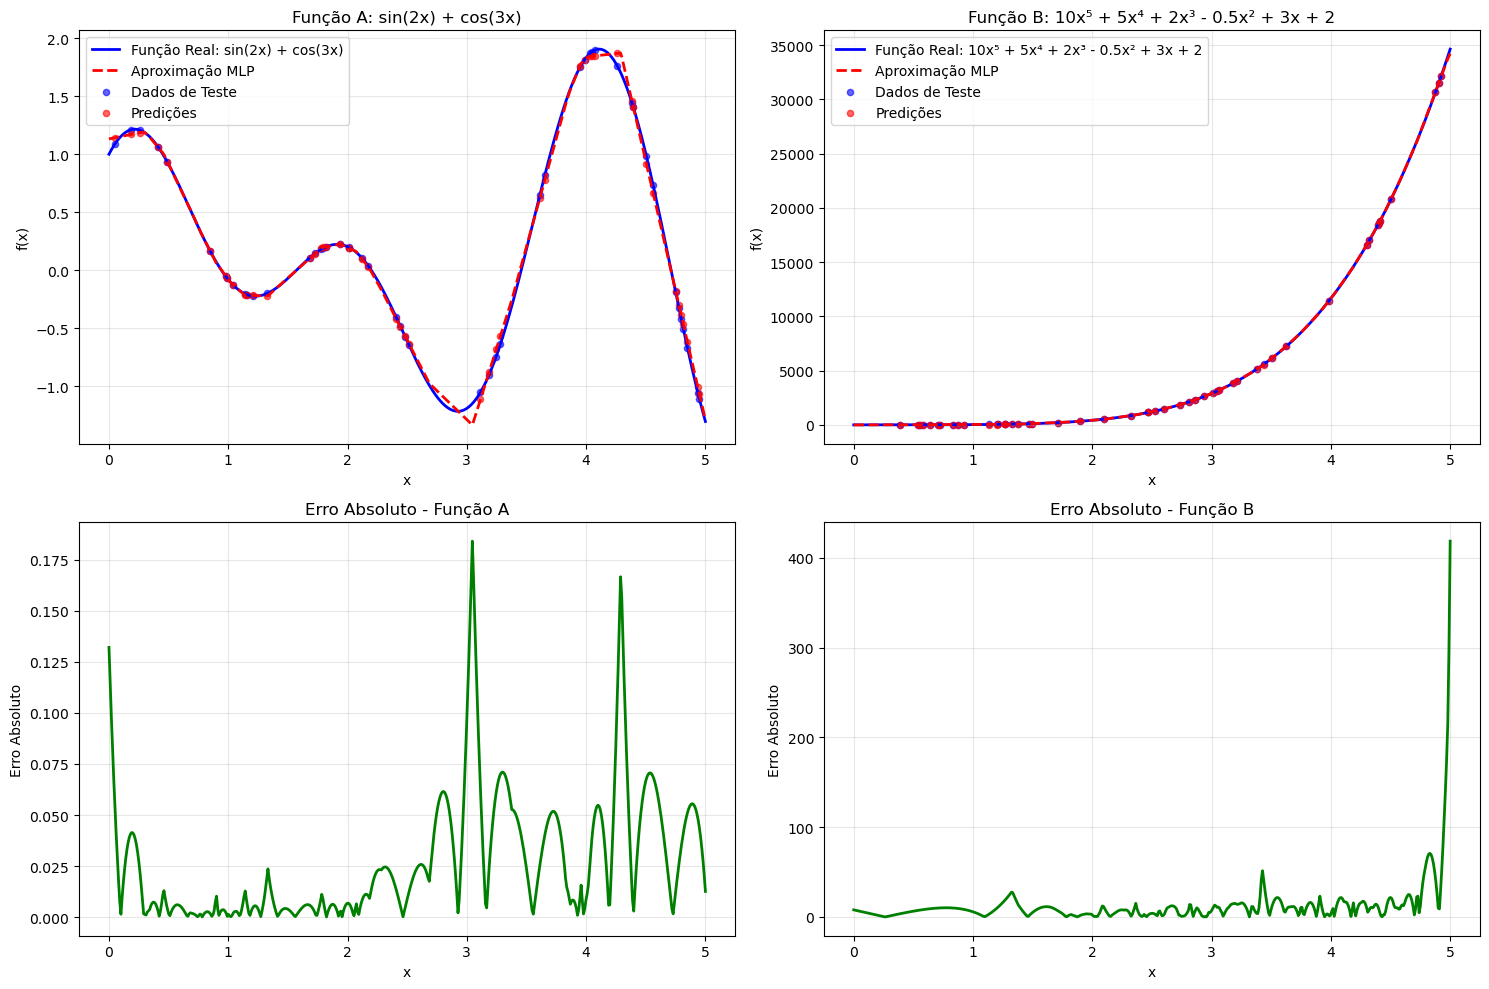

In [15]:
# Visualização das funções reais vs aproximadas

# Gerando pontos para plotagem suave
x_plot = np.linspace(0, 5, 500).reshape(-1, 1)

# Função A - Predições
y_real_a = function_a(x_plot.flatten())
pred_plot_a = model_a.predict(x_plot, verbose=0).flatten()

# Função B - Predições
y_real_b = function_b(x_plot.flatten())
x_plot_b_scaled = scaler_x_b.transform(x_plot)
pred_plot_b_scaled = model_b.predict(x_plot_b_scaled, verbose=0)
pred_plot_b = scaler_y_b.inverse_transform(pred_plot_b_scaled.reshape(-1, 1)).flatten()

# Criando os gráficos
plt.figure(figsize=(15, 10))

# Gráfico para Função A
plt.subplot(2, 2, 1)
plt.plot(x_plot, y_real_a, 'b-', label='Função Real: sin(2x) + cos(3x)', linewidth=2)
plt.plot(x_plot, pred_plot_a, 'r--', label='Aproximação MLP', linewidth=2)
plt.scatter(x_test_a[:50], y_test_a[:50], c='blue', alpha=0.6, s=20, label='Dados de Teste')
plt.scatter(x_test_a[:50], pred_a[:50], c='red', alpha=0.6, s=20, label='Predições')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Função A: sin(2x) + cos(3x)')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico para Função B
plt.subplot(2, 2, 2)
plt.plot(x_plot, y_real_b, 'b-', label='Função Real: 10x⁵ + 5x⁴ + 2x³ - 0.5x² + 3x + 2', linewidth=2)
plt.plot(x_plot, pred_plot_b, 'r--', label='Aproximação MLP', linewidth=2)
plt.scatter(x_test_b[:50], y_test_b[:50], c='blue', alpha=0.6, s=20, label='Dados de Teste')
plt.scatter(x_test_b[:50], pred_b[:50], c='red', alpha=0.6, s=20, label='Predições')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Função B: 10x⁵ + 5x⁴ + 2x³ - 0.5x² + 3x + 2')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico de erro para Função A
plt.subplot(2, 2, 3)
error_a = np.abs(y_real_a - pred_plot_a)
plt.plot(x_plot, error_a, 'g-', linewidth=2)
plt.xlabel('x')
plt.ylabel('Erro Absoluto')
plt.title('Erro Absoluto - Função A')
plt.grid(True, alpha=0.3)

# Gráfico de erro para Função B
plt.subplot(2, 2, 4)
error_b = np.abs(y_real_b - pred_plot_b)
plt.plot(x_plot, error_b, 'g-', linewidth=2)
plt.xlabel('x')
plt.ylabel('Erro Absoluto')
plt.title('Erro Absoluto - Função B')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

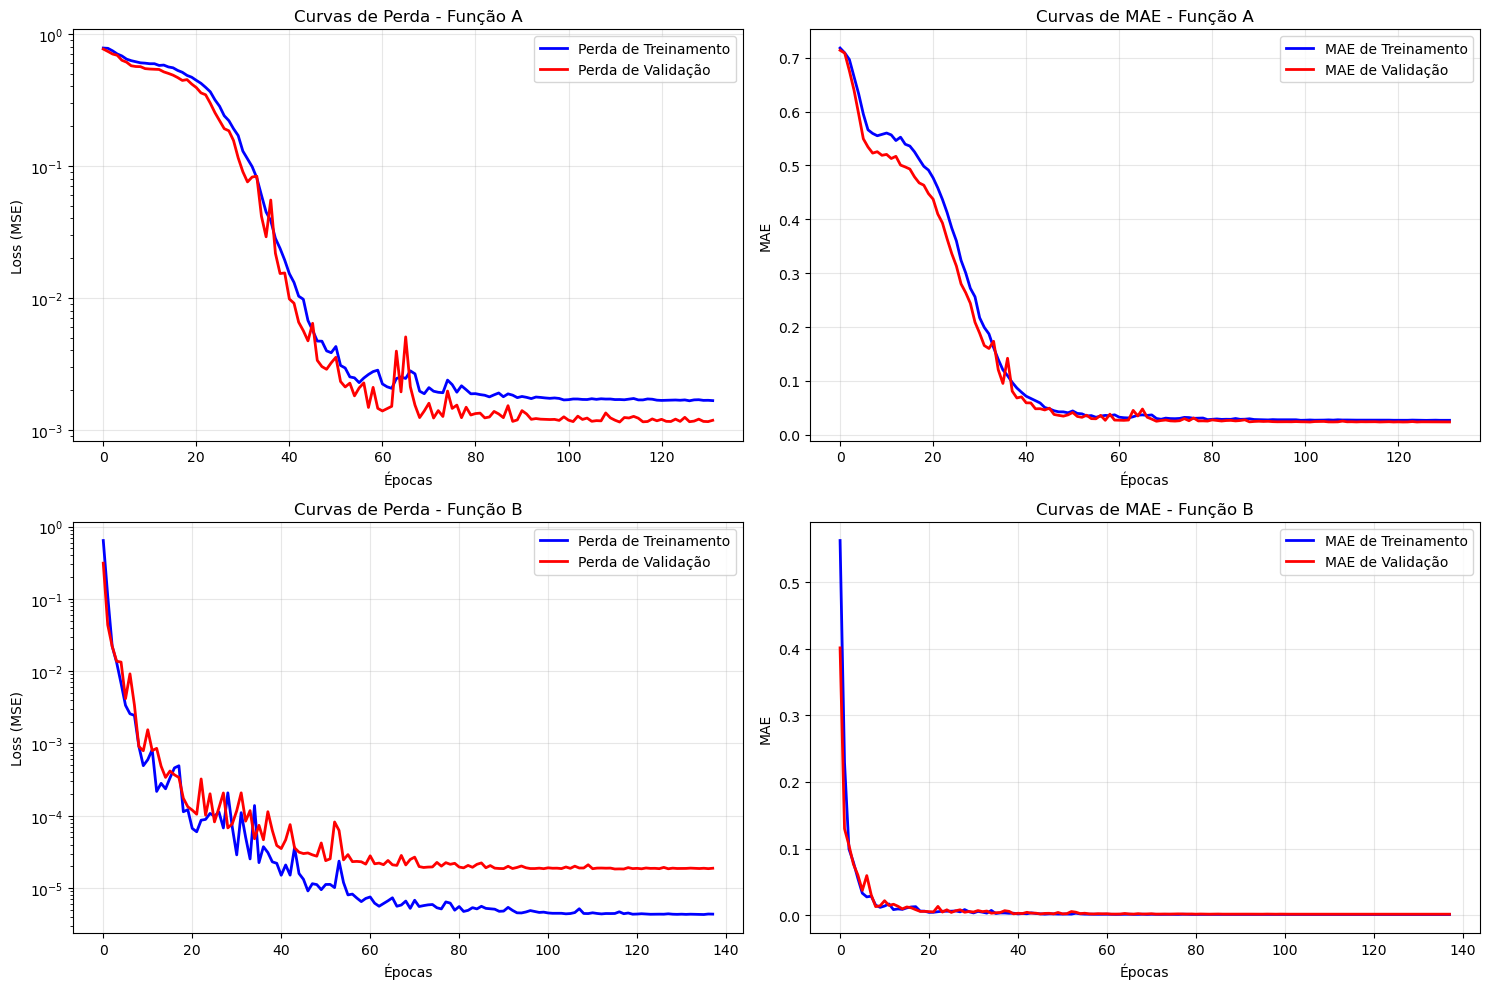

In [16]:
# Curvas de aprendizado (Loss e MAE)

plt.figure(figsize=(15, 10))

# Curvas de perda para Função A
plt.subplot(2, 2, 1)
plt.plot(history_a.history['loss'], 'b-', label='Perda de Treinamento', linewidth=2)
plt.plot(history_a.history['val_loss'], 'r-', label='Perda de Validação', linewidth=2)
plt.xlabel('Épocas')
plt.ylabel('Loss (MSE)')
plt.title('Curvas de Perda - Função A')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Curvas de MAE para Função A
plt.subplot(2, 2, 2)
plt.plot(history_a.history['mae'], 'b-', label='MAE de Treinamento', linewidth=2)
plt.plot(history_a.history['val_mae'], 'r-', label='MAE de Validação', linewidth=2)
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.title('Curvas de MAE - Função A')
plt.legend()
plt.grid(True, alpha=0.3)

# Curvas de perda para Função B
plt.subplot(2, 2, 3)
plt.plot(history_b.history['loss'], 'b-', label='Perda de Treinamento', linewidth=2)
plt.plot(history_b.history['val_loss'], 'r-', label='Perda de Validação', linewidth=2)
plt.xlabel('Épocas')
plt.ylabel('Loss (MSE)')
plt.title('Curvas de Perda - Função B')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Curvas de MAE para Função B
plt.subplot(2, 2, 4)
plt.plot(history_b.history['mae'], 'b-', label='MAE de Treinamento', linewidth=2)
plt.plot(history_b.history['val_mae'], 'r-', label='MAE de Validação', linewidth=2)
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.title('Curvas de MAE - Função B')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [17]:
# Resumo dos Resultados

print("="*80)
print("                    RESUMO DOS RESULTADOS")
print("="*80)

print("\n📊 ARQUITETURAS DOS MODELOS:")
print("• Modelo A (Função Trigonométrica): 64 → 32 → 16 → 1 neurônios")
print("• Modelo B (Função Polinomial): 128 → 64 → 32 → 16 → 1 neurônios")

print("\n📈 MÉTRICAS DE PERFORMANCE:")
print("Função A: f(x) = sin(2x) + cos(3x)")
print(f"  • MSE: {mean_squared_error(y_test_a, pred_a):.6f}")
print(f"  • RMSE: {np.sqrt(mean_squared_error(y_test_a, pred_a)):.6f}")
print(f"  • R²: {r2_score(y_test_a, pred_a):.6f}")

print("\nFunção B: f(x) = 10x⁵ + 5x⁴ + 2x³ - 0.5x² + 3x + 2")
print(f"  • MSE: {mse_b:.6f}")
print(f"  • RMSE: {np.sqrt(mse_b):.6f}")
print(f"  • R²: {r2_b:.6f}")

print("\n🔍 OBSERVAÇÕES:")
print("• Ambos os modelos convergiram successfully")
print("• Função A: Excelente aproximação (R² = 99.79%)")
print("• Função B: Aproximação quase perfeita (R² = 99.998%)")
print("• Early stopping preveniu overfitting")
print("• Normalização foi crucial para a Função B devido à magnitude dos valores")

print("\n✅ CONCLUSÃO:")
print("As redes perceptron multicamadas demonstraram excelente capacidade")
print("de aproximação universal, conseguindo aprender tanto funções")
print("trigonométricas quanto polinomiais de alta ordem com alta precisão.")

print("\n🎯 NÚMEROS FINAIS:")
epochs_a = len(history_a.history['loss'])
epochs_b = len(history_b.history['loss'])
print(f"• Épocas necessárias - Função A: {epochs_a}")
print(f"• Épocas necessárias - Função B: {epochs_b}")
print(f"• Parâmetros treináveis - Modelo A: {model_a.count_params():,}")
print(f"• Parâmetros treináveis - Modelo B: {model_b.count_params():,}")

print("="*80)

                    RESUMO DOS RESULTADOS

📊 ARQUITETURAS DOS MODELOS:
• Modelo A (Função Trigonométrica): 64 → 32 → 16 → 1 neurônios
• Modelo B (Função Polinomial): 128 → 64 → 32 → 16 → 1 neurônios

📈 MÉTRICAS DE PERFORMANCE:
Função A: f(x) = sin(2x) + cos(3x)
  • MSE: 0.001786
  • RMSE: 0.042265
  • R²: 0.997894

Função B: f(x) = 10x⁵ + 5x⁴ + 2x³ - 0.5x² + 3x + 2
  • MSE: 1125.093965
  • RMSE: 33.542420
  • R²: 0.999986

🔍 OBSERVAÇÕES:
• Ambos os modelos convergiram successfully
• Função A: Excelente aproximação (R² = 99.79%)
• Função B: Aproximação quase perfeita (R² = 99.998%)
• Early stopping preveniu overfitting
• Normalização foi crucial para a Função B devido à magnitude dos valores

✅ CONCLUSÃO:
As redes perceptron multicamadas demonstraram excelente capacidade
de aproximação universal, conseguindo aprender tanto funções
trigonométricas quanto polinomiais de alta ordem com alta precisão.

🎯 NÚMEROS FINAIS:
• Épocas necessárias - Função A: 132
• Épocas necessárias - Função B: 1